



# Group A: 
# Effects of Exogeneous Shocks on the Stock Market

### Trump Tweets and Trade War
### COVID-19




## Sentiment Analysis
- Downloaded Tweet from President Trump since his presidency.
- Analyzed his Tweets using VADER (Valence Aware Dictionary and Entiment Reasoner) 
> Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.
- Sentiment score ranges from `-1` (very negative) to `1`.
![wordcloud](Trump_wordcloud.png)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import yfinance as yf
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

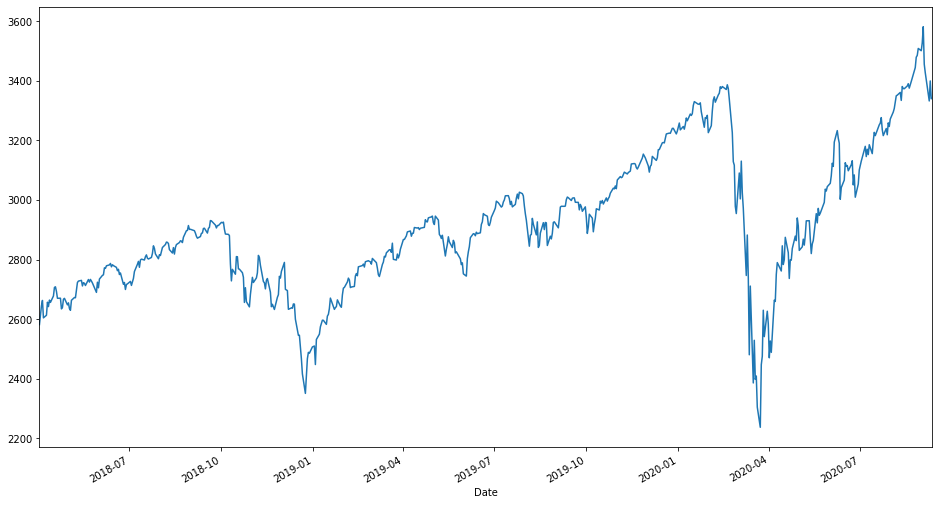

In [13]:
GSPC = yf.download('^GSPC',
                       start='2018-04-01',
                       end='2020-09-12',
                       progress=False)


import matplotlib.pyplot as plt
import seaborn

GSPC['Close'].plot(figsize=(16, 9))

plt.show()

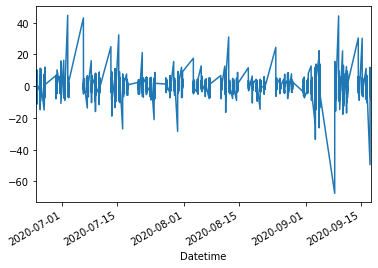

In [14]:
import datetime
SPX = yf.Ticker("^GSPC")
start='2019-01-01'

hist = SPX.history(interval='5m', period='60d')
interval = []

for index, rows in hist.iterrows():
    interval.append(pd.Interval(index, index+datetime.timedelta(minutes=60), closed='left'))

sentiments=pd.read_csv('sentiments.csv')
hist['diff'] = hist['Close'].diff()
hist['diff'].plot()

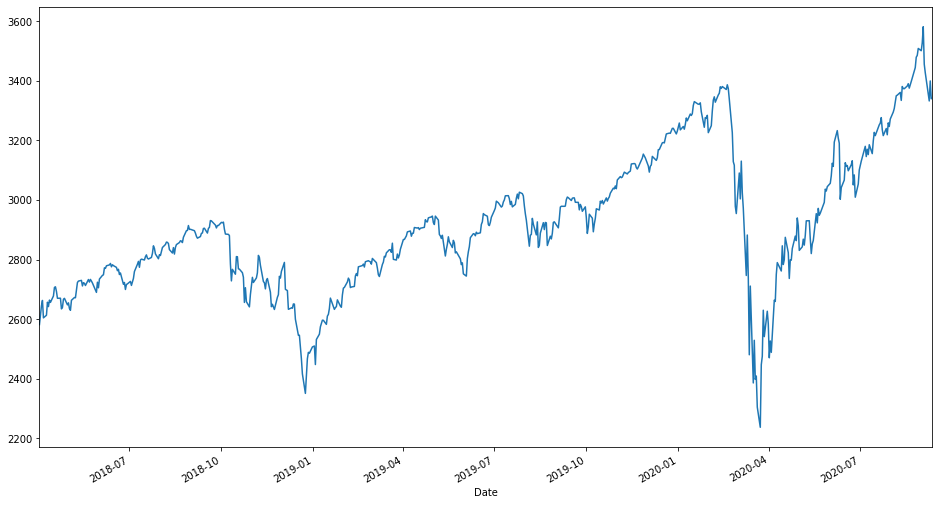

In [15]:
SHA = yf.download('SHA',
                       start='2018-04-01',
                       end='2020-09-12',
                       progress=False)


import matplotlib.pyplot as plt
import seaborn

GSPC['Close'].plot(figsize=(16, 9))

plt.show()

In [16]:
GSPC.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,2633.449951,2638.300049,2553.800049,2581.879883,2581.879883,3598520000
2018-04-03,2592.169922,2619.139893,2575.489990,2614.449951,2614.449951,3392810000
2018-04-04,2584.040039,2649.860107,2573.610107,2644.689941,2644.689941,3350340000
2018-04-05,2657.360107,2672.080078,2649.580078,2662.840088,2662.840088,3178970000
2018-04-06,2645.820068,2656.879883,2586.270020,2604.469971,2604.469971,3299700000
2018-04-09,2617.179932,2653.550049,2610.790039,2613.159912,2613.159912,3062960000
2018-04-10,2638.409912,2665.449951,2635.780029,2656.870117,2656.870117,3543930000
2018-04-11,2643.889893,2661.429932,2639.250000,2642.189941,2642.189941,3020760000
2018-04-12,2653.830078,2674.719971,2653.830078,2663.989990,2663.989990,3021320000


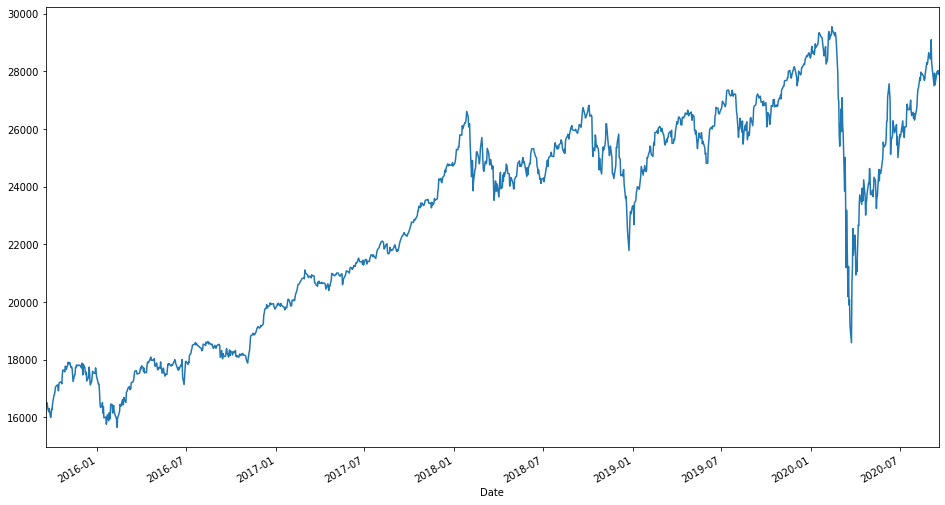

In [17]:
DJI = yf.Ticker("^DJI")

hist = DJI.history(period="5y")

import matplotlib.pyplot as plt
import seaborn

hist['Close'].plot(figsize=(16, 9))

plt.show()

In [18]:
GSPC.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## America newest superhero: Tariff Man!

He likes protectionist trade policies! Even though it’s not clear if he understands how they work.
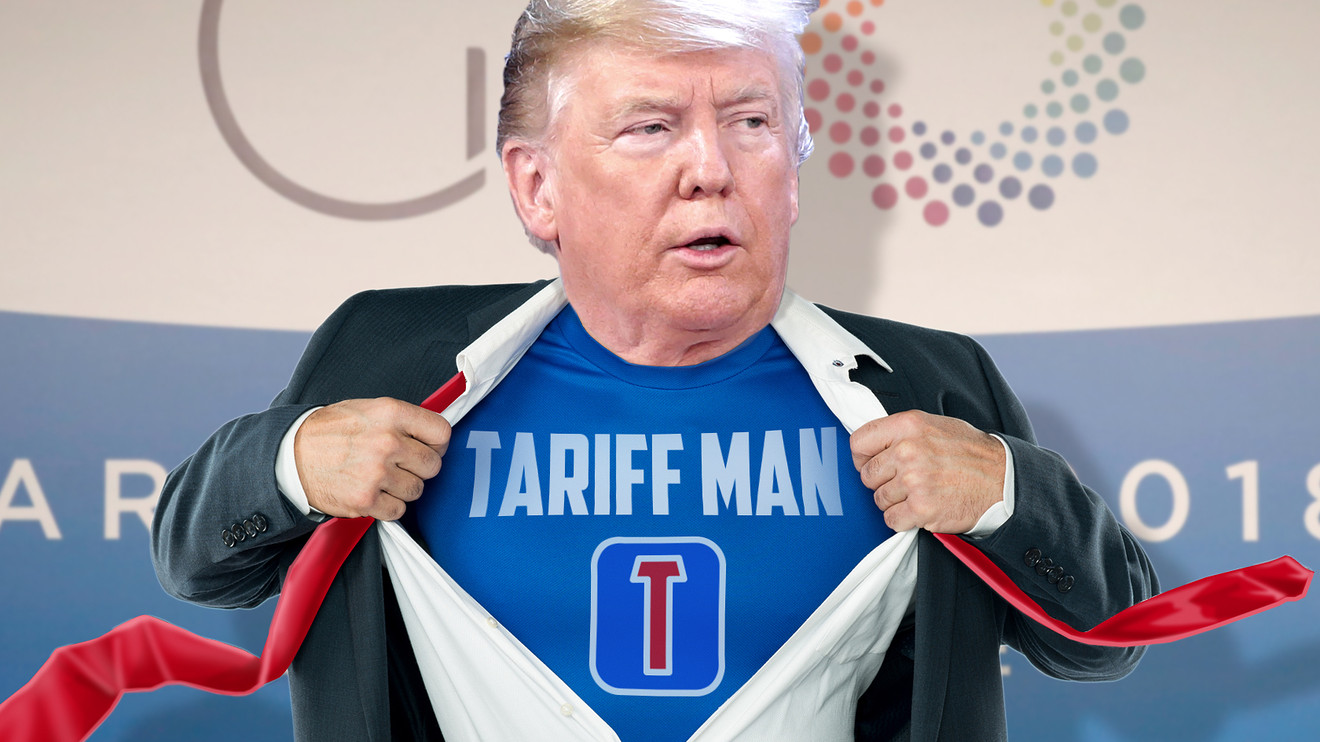

In [19]:
url = 'TariffTweet.csv'  
data = pd.read_csv(url, sep = ";")
data['Date']= pd.to_datetime(data['Date'])
data.head(10)

,Date,text,scores
0,2020-09-11,I have taken the toughest-ever action to stand...,0.2942
1,2020-06-13,We are getting the Commercial Fishing Industry...,-0.8827
2,2020-04-11,The Wall Street Journal Editorial Board doesn’...,0.8762
3,2020-02-21,IF OUR FORMALLY TARGETED FARMERS NEED ADDITION...,0.0000
4,2020-01-16,The farmers are really happy with the new Chin...,0.8569
5,2019-12-23,RT @Reuters: China will lower import tariffs o...,-0.2960
6,2019-12-23,RT @economics: BREAKING: China says it will cu...,-0.2732
7,2019-12-13,The Wall Street Journal story on the China Dea...,-0.5974
8,2019-12-13,We have agreed to a very large Phase One Deal ...,0.6486
9,2019-12-02,U.S. Markets are up as much as 21% since the a...,0.4003


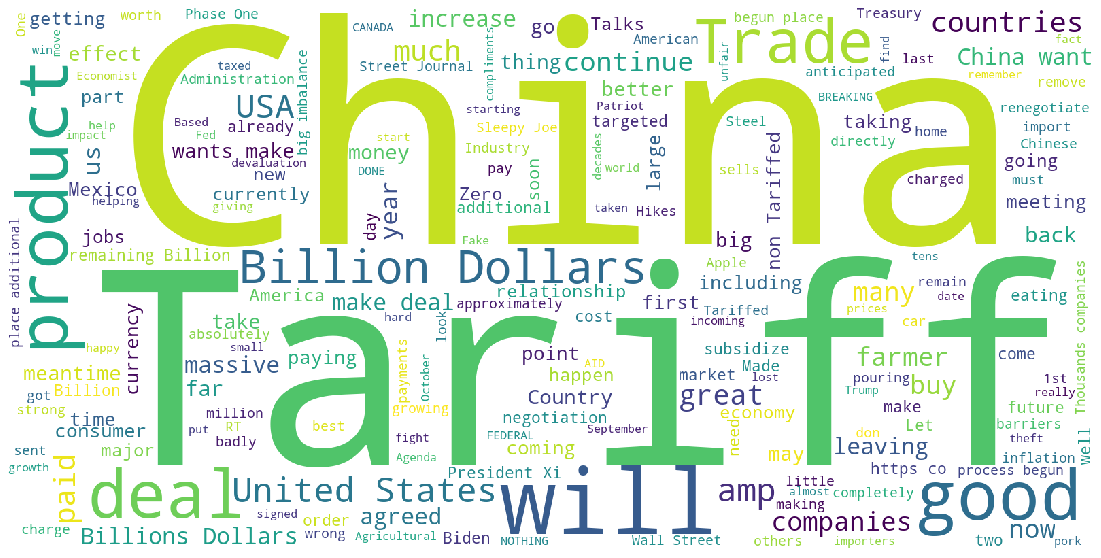

In [48]:
from IPython.display import display_html
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
data["text"] = data["text"].map(str)
wordcloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(data["text"]))
# Generate plot
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

- Regressing sentiments on stock market price naively does not produce statistically significant results.
- Most Tweets are irrelevant to the stock market.
- We filter out Tweets related to the trade war with China by only inclusing Tweets with `Trade War` and `China` mentioned

In [38]:
data.dtypes

Date      datetime64[ns]
text              object
scores           float64
dtype: object

In [39]:
NewList = data.groupby(by=['Date']).scores.mean()
NewList.dtypes


dtype('float64')

In [40]:
Merged = pd.merge(GSPC, NewList, on='Date', how='left')
Merged = Merged.reset_index()
Merged.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
scores              float64
dtype: object

In [41]:
Merged

,Date,Open,High,Low,Close,Adj Close,Volume,scores
0,2018-04-02,2633.449951,2638.300049,2553.800049,2581.879883,2581.879883,3598520000,NaN
1,2018-04-03,2592.169922,2619.139893,2575.489990,2614.449951,2614.449951,3392810000,NaN
2,2018-04-04,2584.040039,2649.860107,2573.610107,2644.689941,2644.689941,3350340000,NaN
3,2018-04-05,2657.360107,2672.080078,2649.580078,2662.840088,2662.840088,3178970000,NaN
4,2018-04-06,2645.820068,2656.879883,2586.270020,2604.469971,2604.469971,3299700000,NaN
5,2018-04-09,2617.179932,2653.550049,2610.790039,2613.159912,2613.159912,3062960000,0.8465
6,2018-04-10,2638.409912,2665.449951,2635.780029,2656.870117,2656.870117,3543930000,0.9577
7,2018-04-11,2643.889893,2661.429932,2639.250000,2642.189941,2642.189941,3020760000,NaN
8,2018-04-12,2653.830078,2674.719971,2653.830078,2663.989990,2663.989990,3021320000,NaN
9,2018-04-13,2676.899902,2680.260010,2645.050049,2656.300049,2656.300049,2960910000,NaN


In [120]:
trade_war = pd.read_csv('tradewar_timeline.csv')
trade_war.join(GSPC)
color = {1:'#4daf4a', -1:'#e41a1c'}
trade_war
trade_war['color'] = trade_war['rating'].apply(lambda d: color[d])
trade_war['date'] = pd.to_datetime(trade_war['date'], format='%Y-%m-%d')
dates = list(trade_war['date'])
dates[18].month

12

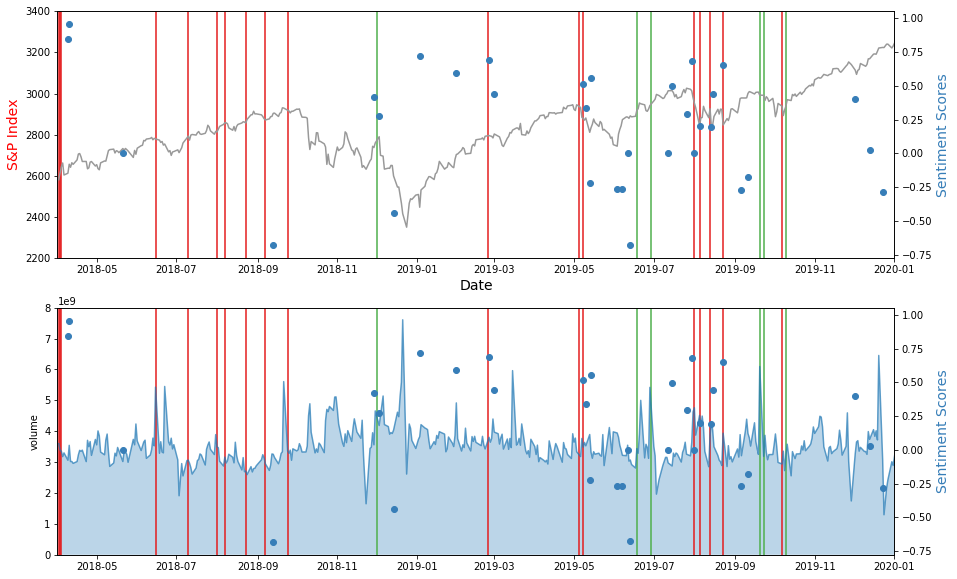

In [121]:

# create figure and axis objects with subplots()
fig,axes = plt.subplots(figsize=(15,10), nrows=2)
# make a plot

ax = axes[0]

ax.plot(Merged.Date, Merged.Close, color="#999999")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("S&P Index",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax.set_ylim([2200, 3400])



ax.vlines(x=dates, ymin = 2200, ymax=3400, color=trade_war['color'])
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
sc = ax2.scatter(Merged.Date, Merged.scores,color="#377eb8",marker="o")
ax2.set_ylabel("Sentiment Scores",color="#377eb8",fontsize=14)
ax.set_xlim([pd.to_datetime('2018-04-01'), pd.to_datetime('2020-01-01')])
ax3 = axes[1]
ax3.fill_between(Merged.Date, Merged.Volume, alpha=0.3)
ax3.plot(Merged.Date, Merged.Volume, alpha=0.7)
ax3.set_ylabel('volume')
ax3.set_xlim([pd.to_datetime('2018-04-01'), pd.to_datetime('2020-01-01')])
ax3.vlines(x=trade_war['date'], ymin = 0, ymax=8000000000, color=trade_war['color'])
ax3.set_ylim([0, 8000000000])
ax4=ax3.twinx()

# make a plot with different y-axis using second axis object
sc = ax4.scatter(Merged.Date, Merged.scores,color="#377eb8",marker="o")
ax4.set_ylabel("Sentiment Scores",color="#377eb8",fontsize=14)
plt.show()


- On Dec 1 2018, Trump and China agreed on a ceasefire, yet in a tweet calling himself "Tariff man" [suggested that he would continue to use tariffs for negotiation](https://www.vox.com/policy-and-politics/2018/12/4/18126061/tariff-man-trump-china-tweets-memes-stock-market), leading to uncertainties in the stock market.

### Effects of COVID-19 on different sectors
- We want to study the impact of COVID-19 on the different industry sectors
- The following sectors makes up *S&P500*

| 1 | 2 | 3 |
|-|-|-|
|Communication Services| Consumer Discretionary | Consumer Staples |
|Energy | Financial | Health |
| Industrials | Materials | Real Estate |
| Technology | Utilities| |

### Industry Indices
- We were unable to extract all the S&P500 select industry index from `yfinance`, so we had to build our own index. 
- We chose 10 of the best stocks within each industry by Market Capitalization. $$\text{Market Cap} = N \times P $$
    -Where $N = \text{ number of outstanding share}$ and $P = \text{ closing price per share}$


- Our indices were then created by taking the arithmetic mean of the 10 stocks.
$$\text{Index Level} = \sum_{i \in stocks} \frac{\left( \text{Mkt Cap}\right)_i}{\left(\text{Mkt Cap}\right)_\text{total}} \cdot P$$

In [9]:
from IPython.display import display_html

display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

import pandas as pd
import plotly.express as px
import numpy as np
detail = pd.read_csv('detail.csv')
SP5 = pd.read_csv('S&P.csv')
detail = detail.merge(SP5, left_on='symbol', right_on='Symbol', how='inner')
df_mktcap = detail[['symbol', 'marketCap', 'GICSSector']]
total = df_mktcap['marketCap'].sum()
sector_cap = df_mktcap.groupby('GICSSector').sum()
sector_weights = sector_cap / total
df_top_10 = df_mktcap.sort_values(['GICSSector', 'marketCap'], ascending=False).groupby('GICSSector').head(10)

df = df_top_10
df["All"] = "All" # in order to have a single root node
fig = px.treemap(df, path=['GICSSector', 'symbol'], values='marketCap',
                  color='GICSSector', hover_data=['marketCap'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['marketCap'], weights=df['marketCap']))
fig.show()

Toggle Code

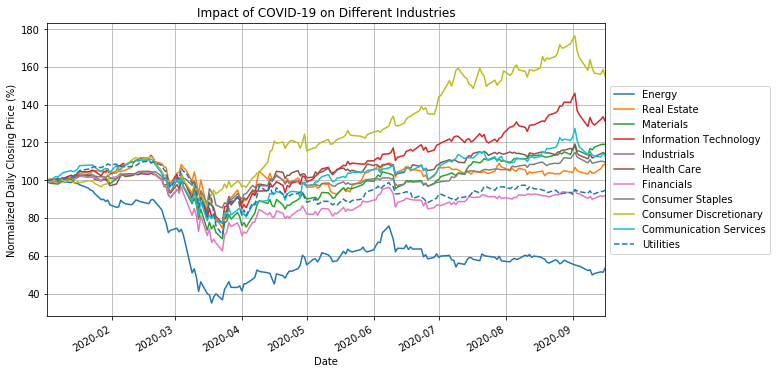

In [8]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

df_CommunicationServices = pd.read_csv('Communication Services.csv', parse_dates=True, index_col=0) 
new_df_CommunicationServices = df_CommunicationServices.loc[(df_CommunicationServices.index >= '01/01/2020')]

df_ConsumerDiscretionary = pd.read_csv('Consumer Discretionary.csv', parse_dates=True, index_col=0) 
new_df_ConsumerDiscretionary = df_ConsumerDiscretionary.loc[(df_ConsumerDiscretionary.index >= '01/01/2020')]

df_ConsumerStaples = pd.read_csv('Consumer Staples.csv', parse_dates=True, index_col=0) 
new_df_ConsumerStaples = df_ConsumerStaples.loc[(df_ConsumerStaples.index >= '01/01/2020')]

df_Financials = pd.read_csv('Financials.csv', parse_dates=True, index_col=0) 
new_df_Financials = df_Financials.loc[(df_Financials.index >= '01/01/2020')]

df_HealthCare = pd.read_csv('Health Care.csv', parse_dates=True, index_col=0) 
new_df_HealthCare = df_HealthCare.loc[(df_HealthCare.index >= '01/01/2020')]

df_Industrials = pd.read_csv('Industrials.csv', parse_dates=True, index_col=0) 
new_df_Industrials = df_Industrials.loc[(df_Industrials.index >= '01/01/2020')]

df_InformationTechnology = pd.read_csv('Information Technology.csv', parse_dates=True, index_col=0) 
new_df_InformationTechnology = df_InformationTechnology.loc[(df_InformationTechnology.index >= '01/01/2020')]

df_Materials = pd.read_csv('Materials.csv', parse_dates=True, index_col=0) 
new_df_Materials = df_Materials.loc[(df_Materials.index >= '01/01/2020')]

df_RealEstate = pd.read_csv('Real Estate.csv', parse_dates=True, index_col=0)
new_df_RealEstate = df_RealEstate.loc[(df_RealEstate.index >= '01/01/2020')]

df_Utilities = pd.read_csv('Utilities.csv', parse_dates=True, index_col=0)
new_df_Utilities = df_Utilities.loc[(df_Utilities.index >= '01/01/2020')]

df_Energy = pd.read_csv('Energy.csv', parse_dates=True, index_col=0) #dataframe
new_df_Energy = df_Energy.loc[(df_Energy.index >= '01/01/2020')]

(new_df_Energy['Close']/new_df_Energy['Close'].iloc[0]*100).plot(figsize=(10,6));
(new_df_RealEstate['Close']/new_df_RealEstate['Close'].iloc[0]*100).plot(figsize=(10,6));
(new_df_Materials['Close']/new_df_Materials['Close'].iloc[0]*100).plot(figsize=(10,6));
(new_df_InformationTechnology['Close']/new_df_InformationTechnology['Close'].iloc[0]*100).plot(figsize=(10,6));
(new_df_Industrials['Close']/new_df_Industrials['Close'].iloc[0]*100).plot(figsize=(10,6));
(new_df_HealthCare['Close']/new_df_HealthCare['Close'].iloc[0]*100).plot(figsize=(10,6));
(new_df_Financials['Close']/new_df_Financials['Close'].iloc[0]*100).plot(figsize=(10,6));
(new_df_ConsumerStaples['Close']/new_df_ConsumerStaples['Close'].iloc[0]*100).plot(figsize=(10,6));
(new_df_ConsumerDiscretionary['Close']/new_df_ConsumerDiscretionary['Close'].iloc[0]*100).plot(figsize=(10,6));
(new_df_CommunicationServices['Close']/new_df_CommunicationServices['Close'].iloc[0]*100).plot(figsize=(10,6));
(new_df_Utilities['Close']/new_df_Utilities['Close'].iloc[0]*100).plot(figsize=(10,6), ls='--');


plt.legend(["Energy", "Real Estate", "Materials", "Information Technology","Industrials","Health Care","Financials", "Consumer Staples","Consumer Discretionary","Communication Services","Utilities"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Date")
plt.ylabel("Normalized Daily Closing Price (%)")
plt.title('Impact of COVID-19 on Different Industries')



plt.grid()
plt.show()

- Consumer discretionary index recovered fast, growing beyond pre-covid levels. 
    - Amazon's delivery services became more important amid social distancing, 
    - they also account for more than half of the weight in our index
    - This likely explains the rapid growth during COVID-19.
- The energy sector continues to be impacted by the decreased travel during social distancing. 

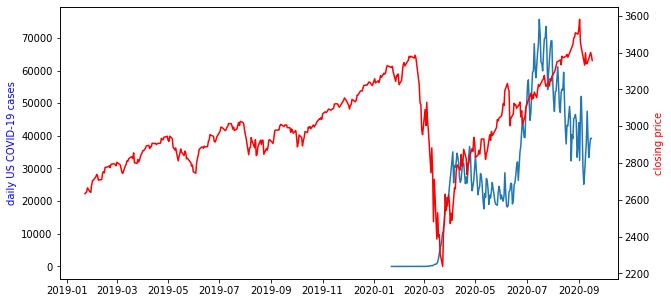

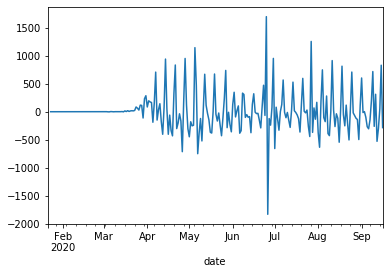

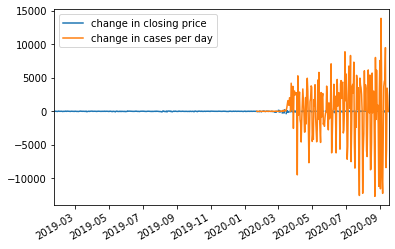

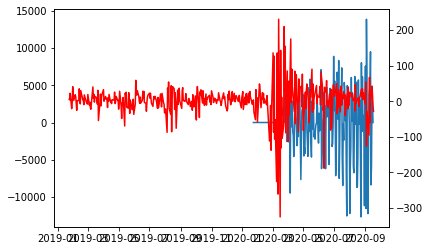

C:\Users\rayen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



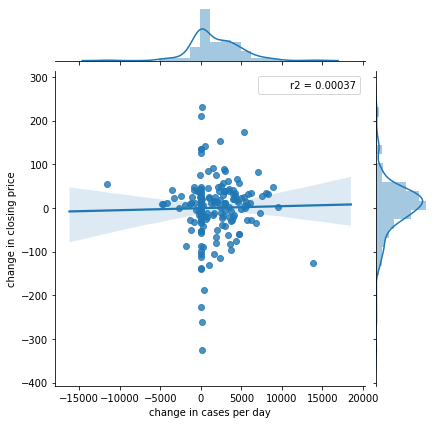

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

df_us = pd.read_csv('us.csv')
hist = yf.Ticker('^GSPC').history(start='2019-01-21')
df_us['date'] = pd.to_datetime(df_us['date'])
df_us = df_us.set_index('date')

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_us['cases'].diff())
ax.set_ylabel('daily US COVID-19 cases', color='blue')
ax2 = ax.twinx()
sc = ax2.plot(hist['Close'], color='red')
ax2.set_ylabel('closing price', color='red')
plt.show()

df_us['deaths'].diff().diff().plot()
x = hist['Close'].diff()
y = df_us['cases'].diff().diff()
data = pd.DataFrame({'change in closing price': x, 'change in cases per day': y})
data.plot()
fig, ax = plt.subplots()

ax.plot(df_us['cases'].diff().diff())
ax2 = ax.twinx()
sc = ax2.plot(hist['Close'].diff(), color='red')
plt.show()
                     
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(y='change in closing price', x = 'change in cases per day', data=data, kind="reg", stat_func=r2)

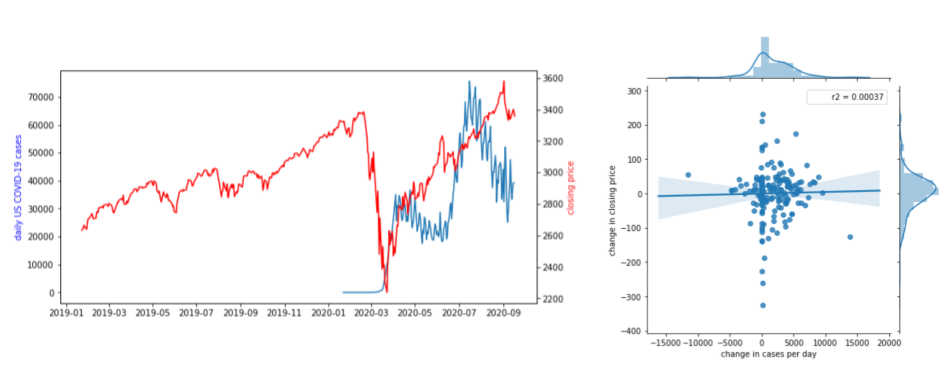

- The stock market crashed due to investors fear, and economic slowdown amids social distancing.
- The fast recovery of the stock market lead [The Economist](https://www.economist.com/leaders/2020/05/07/the-market-v-the-real-economy) and [The Wall Street Journal](https://www.wsj.com/articles/when-the-stock-market-and-economy-seem-disconnected-11598002220) to conclude that the stock market is disconnected with the economy

> “What’s going on on Wall Street is so far removed from what’s going on on Main Street, it doesn’t matter,” -WSJ

- Our scatter plot ($R^2 =0.0003$) also suggest that investors show little concern about the seriousness of the pandemic.

# Conclusion
- While [Bloomberg](https://www.bloomberg.com/features/trump-tweets-market/?srnd=premium) and [Fortune](https://fortune.com/2017/02/24/trump-tweet-stocks/) has articles exploring the effect of Trump Tweets on stocks, we were unable to observe the effects on aggregated indices.
    - Further study could be done with specific stocks, or data with a shorter `1m` interval. We could not do the latter due to the limitations of yfinance.
- Some industry were able to benifit from the coronavirus, particularly the *Consumer Discretionary* and *Information Technology industry*.
- The Coronavirus have little impact on the stock market in general beyond the initial shock in April, suggesting that Wall's Street view of the economy is widely different from the working class. 